In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json

In [6]:
test_accs_all = []
ckpts = ["416", "1250", "1666", "2080"]
for ckpt in ckpts:
    test_accs = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())


test_accs_all = np.array(test_accs_all)

0.11656
0.52708
0.83228
0.96504


In [2]:
test_accs_all = []
ckpts = ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]
for ckpt in ckpts:
    test_accs = (np.load("ckpts/math_aug3_unmemorized_leq_3_total10000_epochs20/checkpoint-"+ckpt+ "/test_answer_types5_seed2.npy")==0)
    print(test_accs.mean())
    # test_accs_all.append(test_accs.mean())
    test_accs_all.append(test_accs.mean())


test_accs_all = np.array(test_accs_all)

0.08124
0.09756
0.09984
0.099
0.10696
0.10464
0.11672
0.11888
0.11768
0.12332


In [7]:
with open('data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [8]:
# subsample_idxs = np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/subsample_idxs.npy")

subsample_idxs = np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/subsample_idxs.npy")

In [9]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

# ckpts = ["832", "1664", "2496", "3328", "4160", "4992", "5824", "6656", "7488", "8320"]
ckpts = ["416", "833", "1250", "1666", "2080"]
# ckpts = ["3332", "6664", "9996", "13328", "16660"]

for ckpt in ckpts:
    # train_correct = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    # train_samples = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs20/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))
    train_correct = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+ckpt+ "/train_aug_subsample_answer_types5_seed2.npy")==0)
    train_samples = (np.load("ckpts/math_aug3_unmemorized_geq_3_total10000_epochs5/checkpoint-"+ckpt+ "/train_aug_subsample_answers5_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(5):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

In [6]:
subsample_idxs_orig = np.load("ckpts/math_aug3_total20000_epochs20/subsample_idxs.npy")


In [7]:
num_memorized_all_orig = []
num_correct_different_all_orig = []
num_incorrect_all_orig = []

for ckpt in ["3332", "6664", "9996", "13328"]:
    train_correct = (np.load(f"ckpts/math_aug3_total20000_epochs20/checkpoint-{ckpt}/train_aug_answer_types4_seed2.npy")==0)
    train_samples = (np.load(f"ckpts/math_aug3_total20000_epochs20/checkpoint-{ckpt}/train_aug_answers4_seed2.npy"))


    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_correct)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(4):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_orig[input_idx]].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all_orig.append(num_memorized_ckpt)
    num_correct_different_all_orig.append(num_correct_different_ckpt)
    num_incorrect_all_orig.append(num_incorrect_ckpt)

train_correct = []
train_samples = []
for seed in ["0", "1", "2", "3", ]:

    train_correct_seed = (np.load(f"ckpts/math_aug3_total20000_epochs20/train_aug_answer_types1_seed{seed}.npy")==0)
    train_samples_seed = (np.load(f"ckpts/math_aug3_total20000_epochs20/train_aug_answers1_seed{seed}.npy"))
    train_correct.append(train_correct_seed)
    train_samples.append(train_samples_seed)

train_correct = np.swapaxes(train_correct, 1, 0,).squeeze()
train_samples = np.swapaxes(train_samples, 1, 0,).squeeze()


num_memorized_ckpt = []
num_correct_different_ckpt = []
num_incorrect_ckpt = []

for input_idx in range(len(train_correct)):
    num_memorized = 0
    num_correct_different = 0
    num_incorrect = 0
    for sample_idx in range(4):
        correct = train_correct[input_idx, sample_idx]
        if correct:
            if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs_orig[input_idx]].strip():
                num_memorized+=1
            else:
                num_correct_different+=1
        else:
            num_incorrect+=1
    num_memorized_ckpt.append(num_memorized)
    num_correct_different_ckpt.append(num_correct_different)
    num_incorrect_ckpt.append(num_incorrect)

num_memorized_all_orig.append(num_memorized_ckpt)
num_correct_different_all_orig.append(num_correct_different_ckpt)
num_incorrect_all_orig.append(num_incorrect_ckpt)

num_memorized_all_orig = np.array(num_memorized_all_orig)
num_correct_different_all_orig = np.array(num_correct_different_all_orig)
num_incorrect_all_orig = np.array(num_incorrect_all_orig)

In [40]:
num_memorized_all_orig.shape

(5, 20000)

In [39]:
np.where(subsample_idxs_orig == 2097)[0][0]

8039

In [8]:
subsample_idxs_orig_filtered = []
for idx in subsample_idxs[:5000]:
    subsample_idxs_orig_filtered.append(np.where(subsample_idxs_orig == idx)[0][0])

In [9]:
num_memorized_all_orig_filtered = num_memorized_all_orig[:, subsample_idxs_orig_filtered]
num_correct_different_all_orig_filtered = num_correct_different_all_orig[:, subsample_idxs_orig_filtered]
num_incorrect_all_orig_filtered = num_incorrect_all_orig[:, subsample_idxs_orig_filtered]


In [54]:
num_incorrect_all_orig_filtered.shape

(5, 5000)

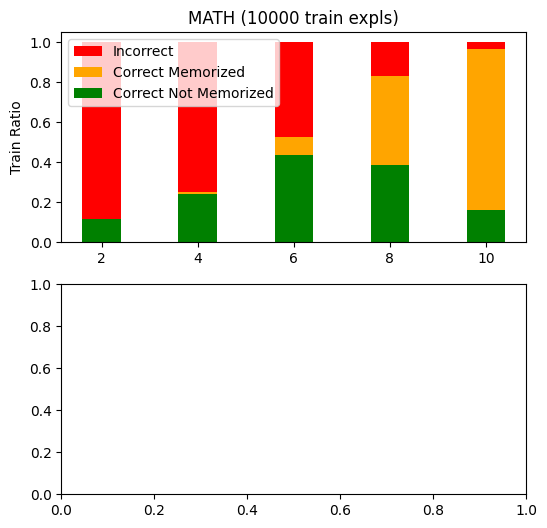

In [13]:
# make 2 subplots
num_ckpts = 5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1 for i in range(num_ckpts)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (10000 train expls)")
ax1.legend()


# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
# ax1.bar([2*i for i in range(1, num_ckpts+1)], [1 for i in range(num_ckpts)], color = "red", label = "Incorrect")
# ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all[[1, 3, 5, 7, 9]]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized")
# ax1.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all[[1, 3, 5, 7, 9]]/5).mean(axis=1)[i]-(num_memorized_all[[1, 3, 5, 7, 9]]/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized")
# ax1.set_xticks([2*i for i in range(1, num_ckpts+1)])
# ax1.set_ylabel("Train Ratio")
# ax1.set_title("MATH (10000 train expls)")
# ax1.legend()

# ax2.bar([2*i for i in range(1, num_ckpts+1)], [1 for i in range(num_ckpts)], color = "red", label = "Incorrect")
# ax2.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all_orig_filtered/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "orange", label = "Correct Memorized")
# ax2.bar([2*i for i in range(1, num_ckpts+1)], [1-(num_incorrect_all_orig_filtered/5).mean(axis=1)[i]-(num_memorized_all_orig_filtered/5).mean(axis=1)[i] for i in range(num_ckpts)], color = "green", label = "Correct Not Memorized")
# ax2.set_xticks([2*i for i in range(1, num_ckpts+1)])


plt.savefig("delete.png")

In [28]:
subsample_idxs_orig[np.where(num_correct_different_all_orig.max(axis=0)<=3)[0]] == subsample_idxs[:2040]

array([False, False, False, ..., False, False, False])

In [29]:
np.where(num_correct_different_all_orig.max(axis=0)<=3)[0]

array([   0,    1,    2, ..., 4995, 4997, 4999])

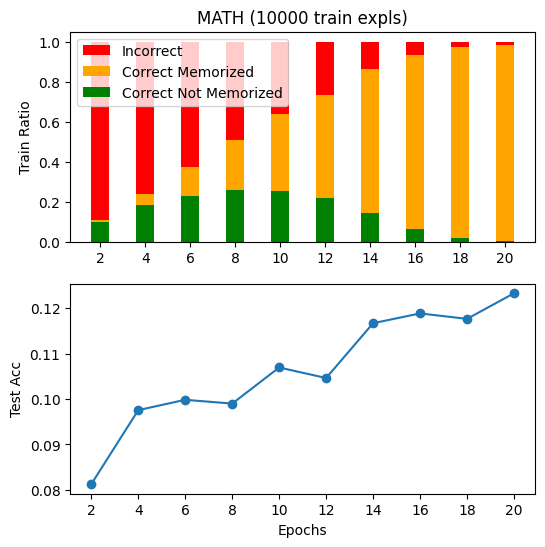

In [15]:
# make 2 subplots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.bar([2*i for i in range(1, 11)], [1 for i in range(10)], color = "red", label = "Incorrect")
ax1.bar([2*i for i in range(1, 11)], [1-(num_incorrect_all/5).mean(axis=1)[i] for i in range(10)], color = "orange", label = "Correct Memorized")
ax1.bar([2*i for i in range(1, 11)], [1-(num_incorrect_all/5).mean(axis=1)[i]-(num_memorized_all/5).mean(axis=1)[i] for i in range(10)], color = "green", label = "Correct Not Memorized")
ax1.set_xticks([2*i for i in range(1, 11)])
ax1.set_ylabel("Train Ratio")
ax1.set_title("MATH (10000 train expls)")
ax1.legend()

ax2.plot([2*i for i in range(1, 11)], test_accs_all, "o-")
ax2.set_xticks([2*i for i in range(1, 11)])
ax2.set_ylabel("Test Acc")
ax2.set_xlabel("Epochs")
plt.savefig("delete.png")

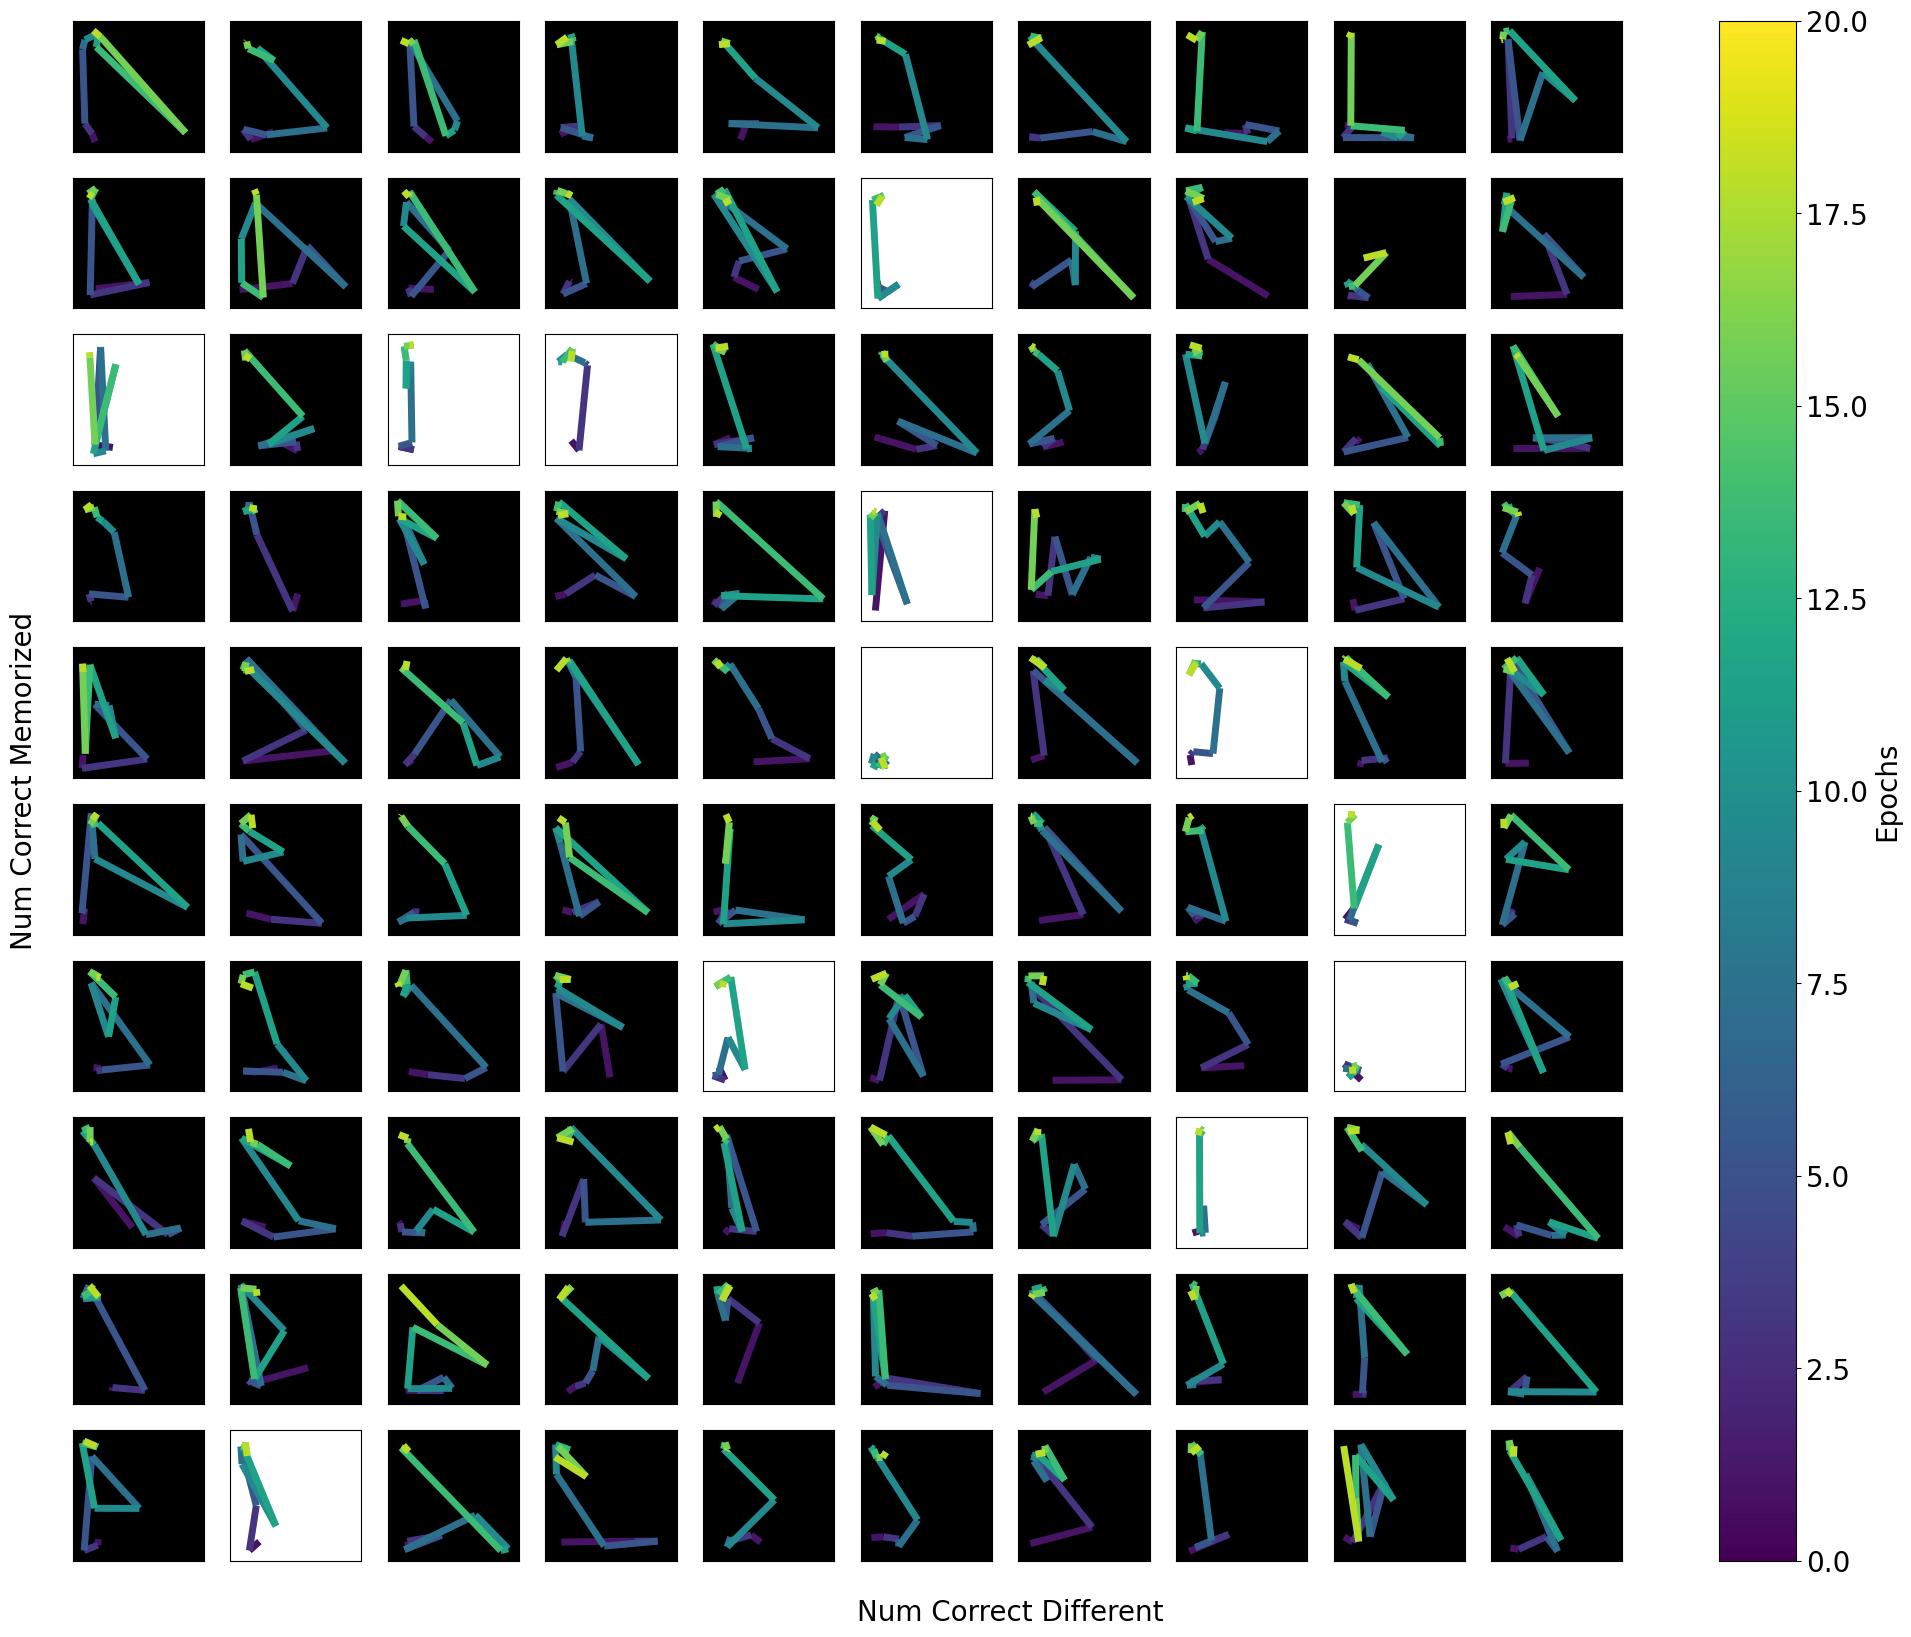

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
color_values = np.linspace(1, 20, 10)




for i in range(100):
    x = num_correct_different_all[:, i]+np.random.uniform(-0.5, 0.5, 10)
    y = num_memorized_all[:, i]+np.random.uniform(-0.5, 0.5, 10)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 20), alpha=1)
    lc.set_array(color_values)
    lc.set_linewidth(5)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    ax[i//10][i%10].set_xlim(-1, 6)
    ax[i//10][i%10].set_ylim(-1, 6)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>1.5:
        ax[i//10][i%10].set_facecolor('black')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('Epochs', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)

plt.savefig("delete.png")

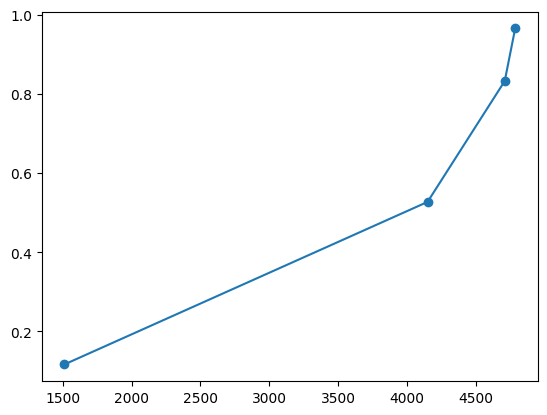

In [21]:
cummulative_num_correct_different = []
for i in range(5):
    cummulative_num_correct_different.append((num_correct_different_all[:i+1].max(axis=0)>=1).sum())
    # cummulative_num_correct_different.append(num_correct_different_all[:i+1].sum())

cummulative_num_correct_different = np.array(cummulative_num_correct_different)
plt.plot(cummulative_num_correct_different[[0, 2, 3, 4]], test_accs_all, "o-")
plt.savefig("delete.png")

In [19]:
test_accs_all

array([0.11656, 0.52708, 0.83228, 0.96504])